In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from astropy.io import fits
import time
from os import listdir
from os.path import isfile, join

In [2]:
def distance(x1,x2,y1,y2,z1,z2):
    x_diff = x1-x2
    y_diff = y1-y2
    z_diff = z1-z2
    dist = (x_diff**2+ y_diff**2 + z_diff**2)**0.5
    return(dist)

In [3]:
dist = np.loadtxt("Tidal_Wave/Large/distances/dist_2300.txt")
print(dist.shape)

(302, 528)


In [4]:
bin_candidates_index = np.loadtxt("Tidal_Wave/Large/bin_candidates_non_tidal_index/bin_candidates_2300.txt").astype(int)
print(bin_candidates_index.shape)

(302, 2)


In [5]:
mypath = "/home/kasper/Team_A/Tidal_Wave/Large/bin_candidates_non_tidal_index_100pc//"
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])

all_candidates = np.loadtxt(mypath+onlyfiles[0]).astype(int)
for j in tqdm(range(1,len(onlyfiles))):
    bin_candidates_index = np.loadtxt(mypath+onlyfiles[j]).astype(int)
    #a = bin_candidates_index.tolist()
    all_candidates = np.append(all_candidates,bin_candidates_index).reshape(-1,2)
    
unique_index,number_of_occurance = np.unique(all_candidates,axis = 0, return_counts = True)

100%|██████████| 70/70 [00:00<00:00, 394.70it/s]


In [6]:
final_candidates = np.where(number_of_occurance>10)[0]


In [7]:
final_candidates

array([   86,  1191,  1713,  1866,  1978,  5189,  6164,  6642,  7716,
        7838, 10252, 10483, 10814, 13885, 14022, 15200, 16325, 17672,
       18210, 20319, 21055, 21416, 22122, 23935, 24332, 27135, 27221,
       27582])

In [8]:
mypath = "/home/kasper/Team_A/Tidal_Wave/Large/Data/binary_candidate_data/"
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])

dist = np.zeros((len(final_candidates),len(onlyfiles)))
for i in tqdm(range(len(onlyfiles))):
    file = fits.open(mypath+onlyfiles[i])
    data1 = file[1].data

    x = data1.field("set_1_x")[np.array(unique_index)[final_candidates]]/3.086e19
    y = data1.field("set_1_y")[np.array(unique_index)[final_candidates]]/3.086e19
    z = data1.field("set_1_z")[np.array(unique_index)[final_candidates]]/3.086e19

    dist[:,i] = distance(x[:,0],x[:,1],y[:,0],y[:,1],z[:,0],z[:,1])

100%|██████████| 528/528 [00:01<00:00, 268.44it/s]


In [9]:
dist

array([[ 1.40283215,  1.51299274,  1.63159299, ...,  0.14329632,
         0.13364731,  0.12278648],
       [ 8.74084854,  8.74661922,  8.75226021, ..., 14.33543491,
        13.44558716, 12.88507748],
       [ 0.42164519,  0.41784546,  0.41608003, ..., 10.96422577,
        11.12351799, 11.28648949],
       ...,
       [ 2.68848681,  2.67319274,  2.65883398, ...,  0.67408282,
         0.68842512,  0.70210642],
       [ 6.97497988,  6.9129014 ,  6.85440207, ...,  0.22402786,
         0.21730408,  0.20960356],
       [ 5.17996216,  5.14511108,  5.1097703 , ...,  0.1910771 ,
         0.19279054,  0.19383265]])

(0.0, 0.5)

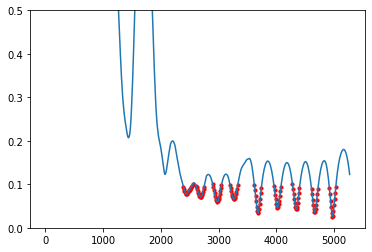

In [10]:
a= np.where(dist[0]<=0.1)[0]
plt.plot(np.arange(len(onlyfiles))*10,dist[0])
plt.scatter(a*10, dist[0,a],color = 'r', s = 10)
plt.ylim(0,0.5)

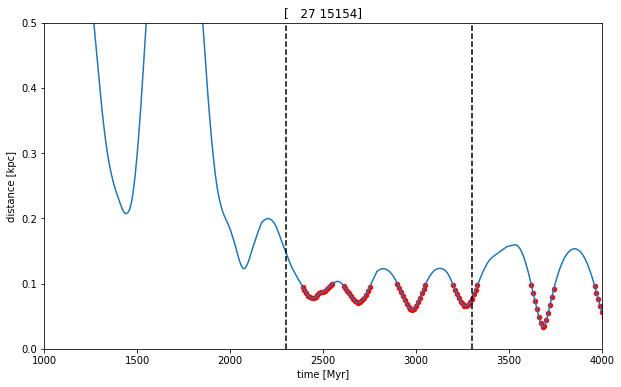

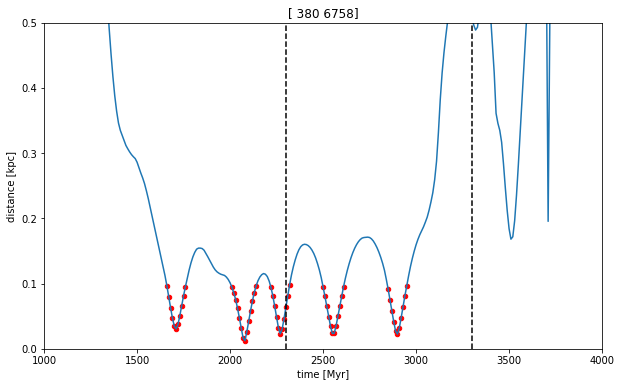

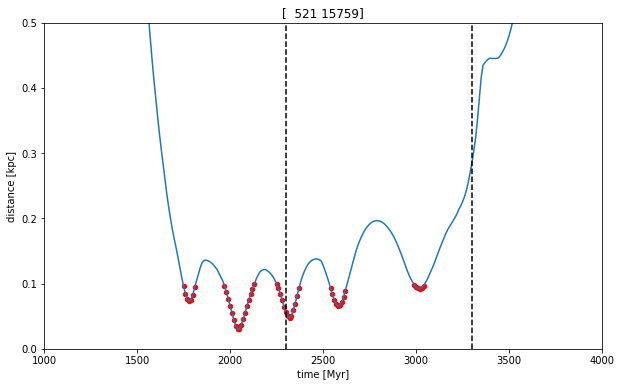

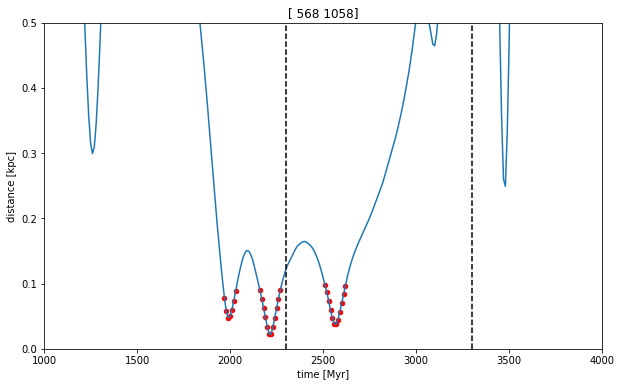

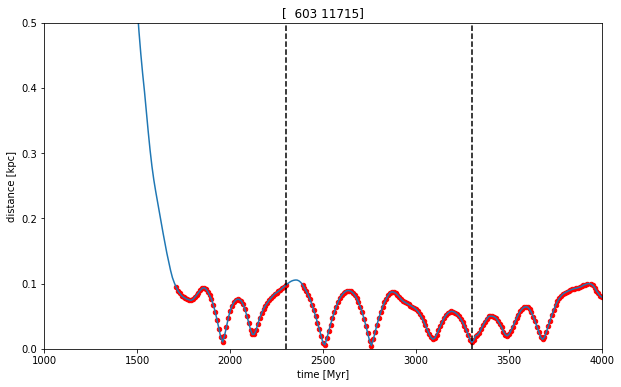

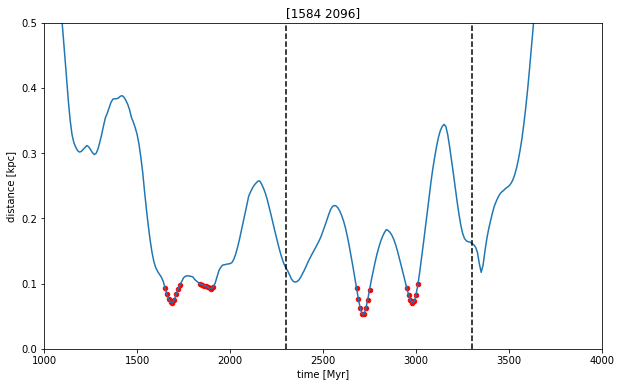

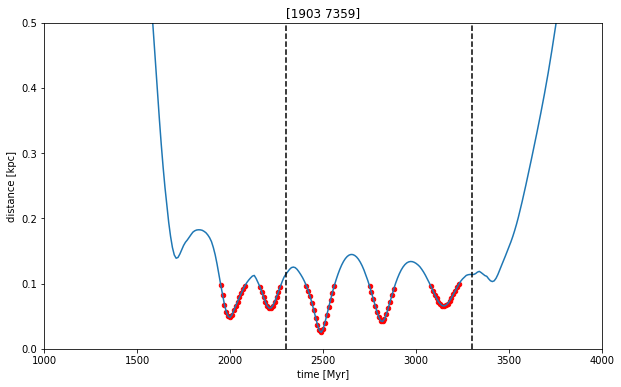

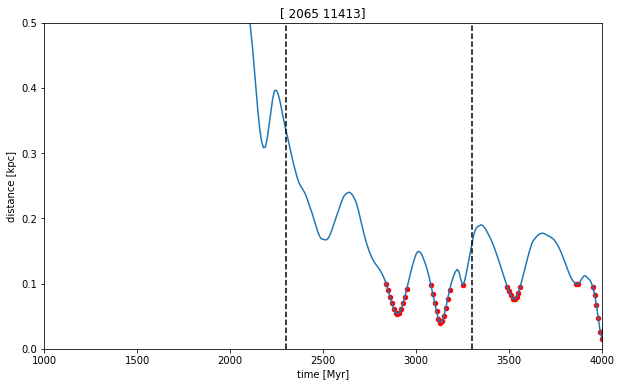

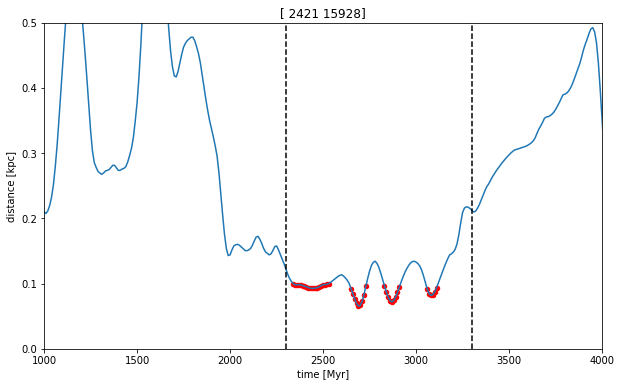

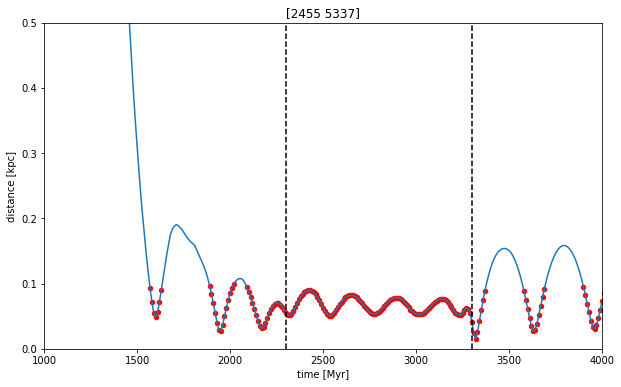

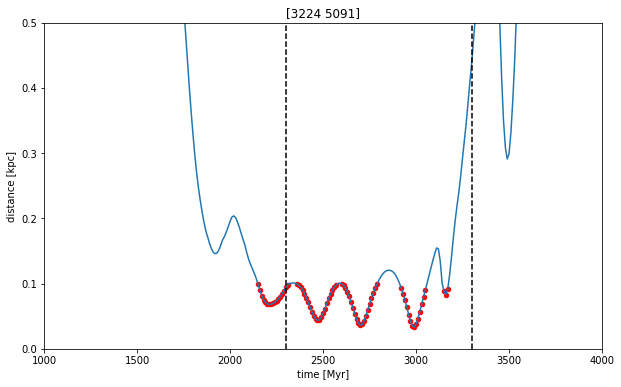

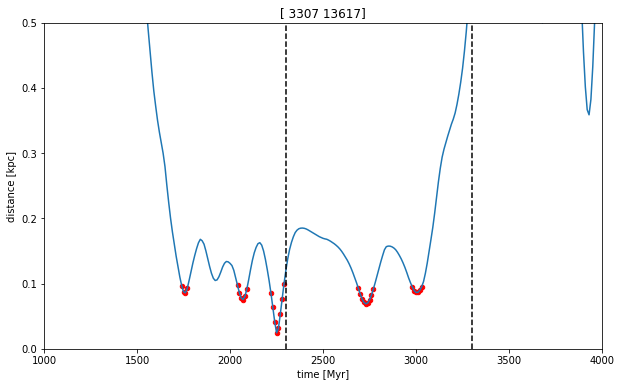

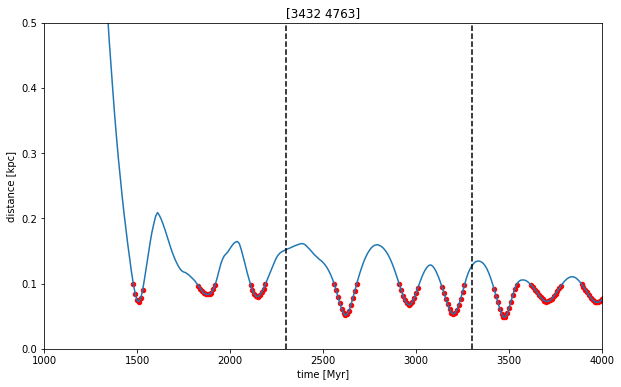

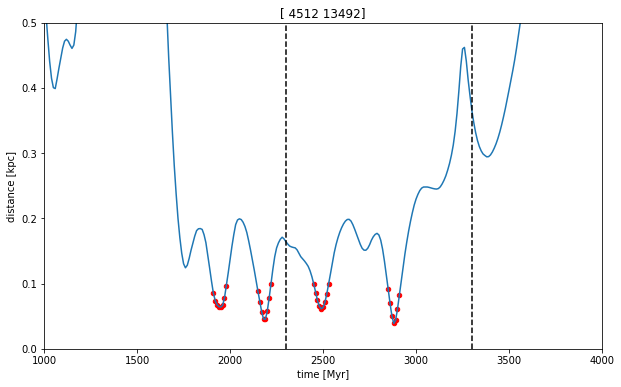

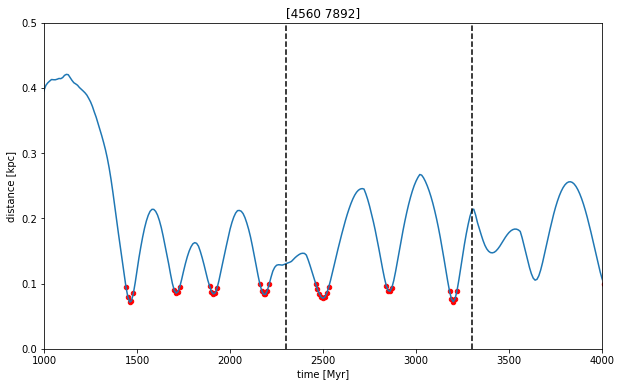

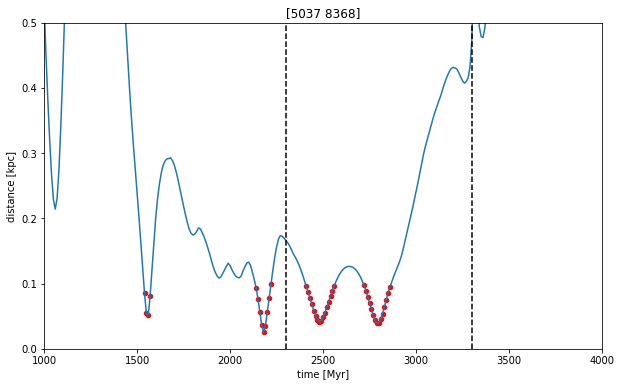

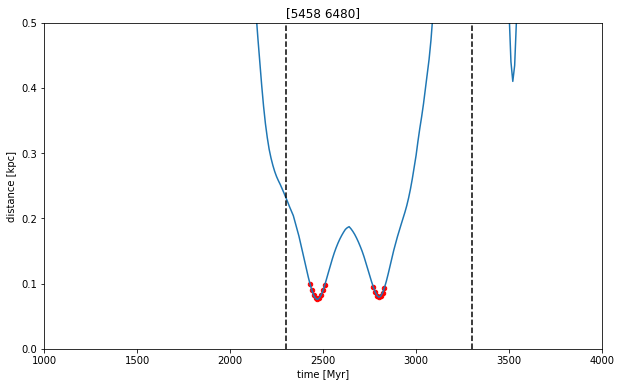

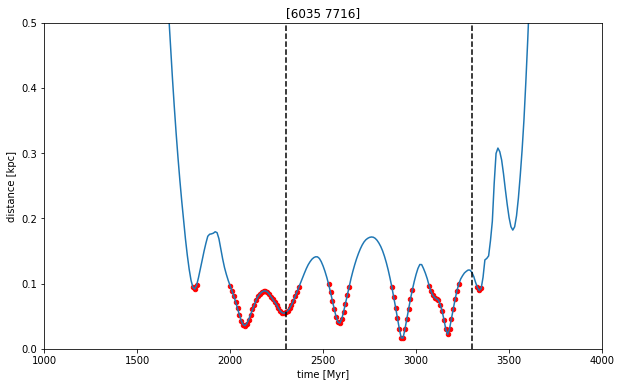

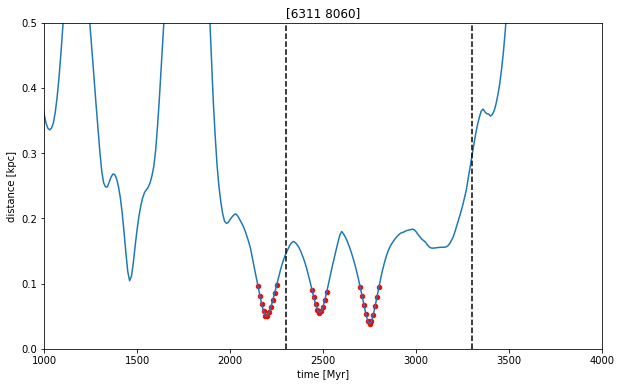

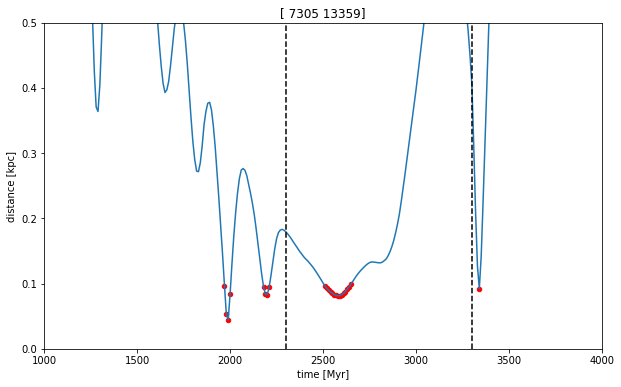

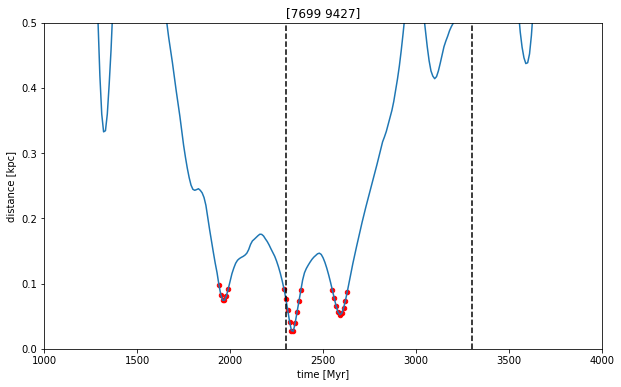

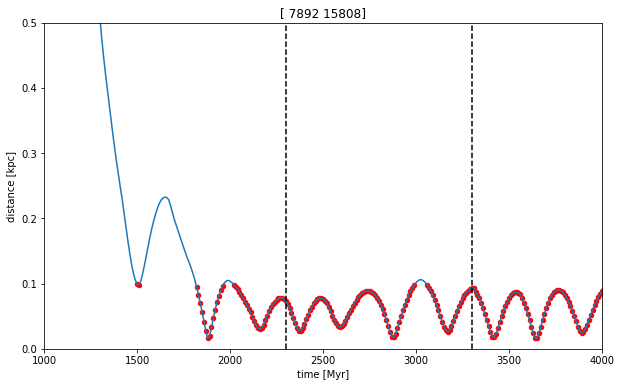

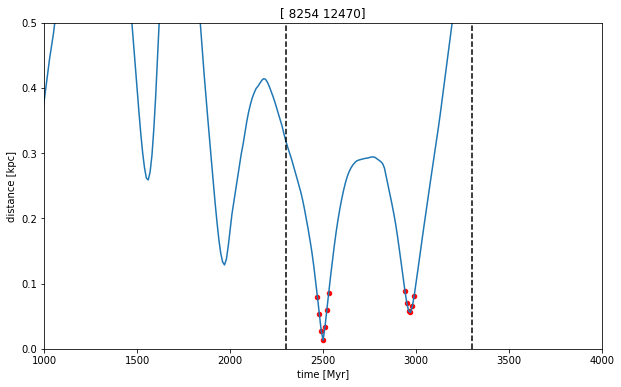

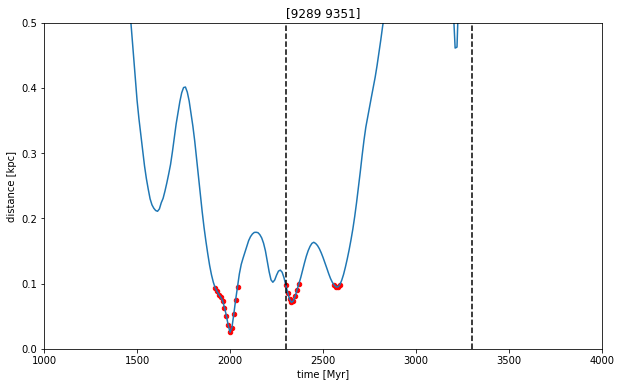

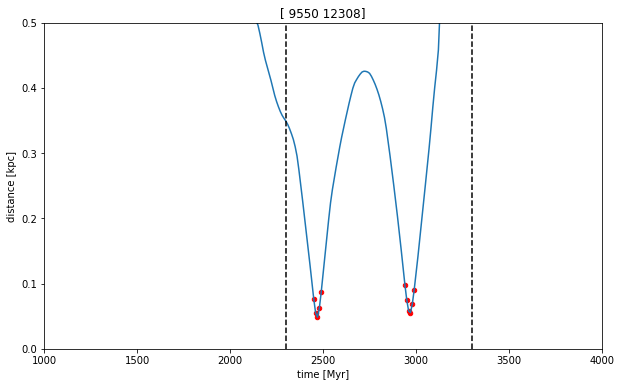

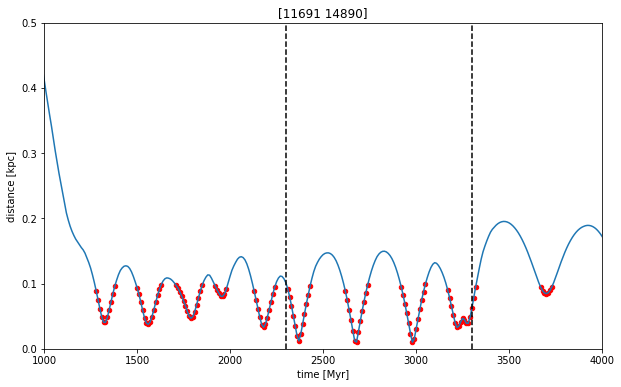

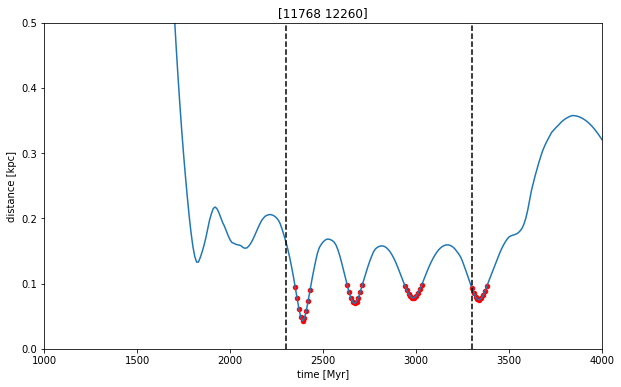

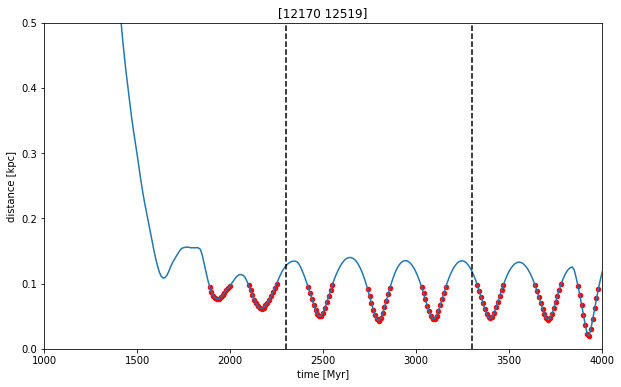

In [11]:
for i in range(len(dist)):
    plt.figure(figsize = (10,6))
    plt.title(str(unique_index[final_candidates[i]]))
    plt.plot(np.arange(len(onlyfiles))*10,dist[i])
    plt.axvline(2300,linestyle = "--", color = "k")
    plt.axvline(3300,linestyle = "--", color = "k")
    a= np.where(dist[i]<=0.1)[0]
    plt.scatter(a*10, dist[i,a],color = 'r', s = 20)
    plt.ylim(0,0.5)
    plt.xlim(1000,4000)
    plt.xlabel("time [Myr]")
    plt.ylabel("distance [kpc]")
    plt.show()

Check for multple systems

In [12]:
multiple_sys = []
for i in range(len(final_candidates)):
    index = final_candidates[i]
    cand1,cand2 = unique_index[index]
    first_1,second_1 = np.where(unique_index == cand1)
    first_2,second_2 = np.where(unique_index == cand2)
    other_candidates_1 = unique_index[first_1,abs(second_1-1)]
    other_candidates_2 = unique_index[first_2,abs(second_2-1)]
    multiple_system = 0
    multiple_system_candidates = []
    for j in range(len(other_candidates_1)):
        if (other_candidates_1[j] in other_candidates_2):
            multiple_system +=1
            multiple_system_candidates.append(other_candidates_1[j])
    if multiple_system > 1:
        print(np.append([cand1,cand2],multiple_system_candidates))
        multiple_sys.append(np.append([cand1,cand2],multiple_system_candidates))

[  380  6758  8134 15670]
[  521 15759  2059  4146  6879]
[  603 11715  1482  3365  8031  8539]
[ 1584  2096  1553  6405 13716]
[ 1903  7359  5688 12970]
[ 2065 11413  3196  5122]
[ 2421 15928  7546  9258 12743]
[ 6311  8060  4290 11092]
[ 7699  9427  8310 10280 14606]


  0%|          | 0/9 [00:00<?, ?it/s]

Original pair =  [ 380 6758]


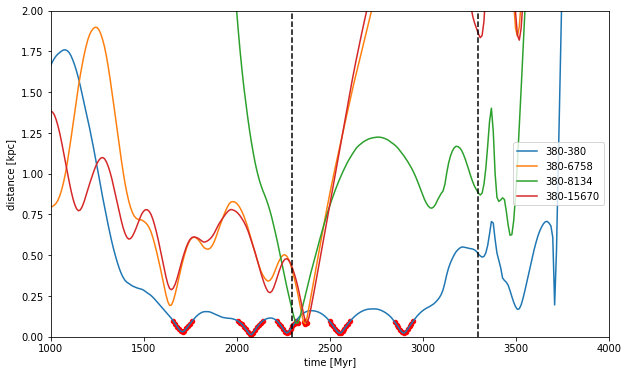

 11%|█         | 1/9 [00:01<00:15,  1.93s/it]

Original pair =  [  521 15759]


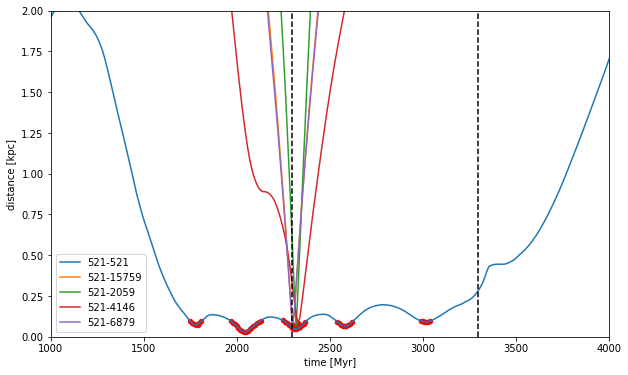

 22%|██▏       | 2/9 [00:04<00:13,  1.98s/it]

Original pair =  [  603 11715]


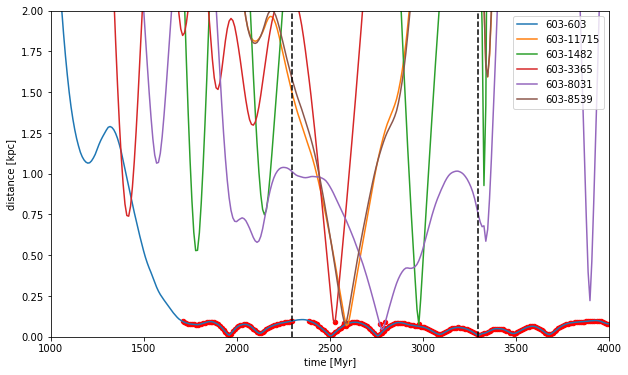

 33%|███▎      | 3/9 [00:06<00:12,  2.02s/it]

Original pair =  [1584 2096]


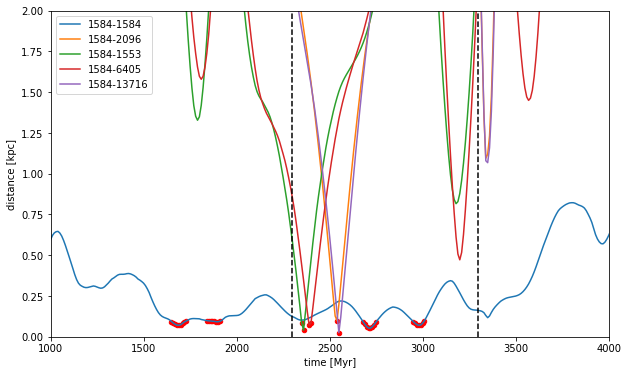

 44%|████▍     | 4/9 [00:08<00:10,  2.02s/it]

Original pair =  [1903 7359]


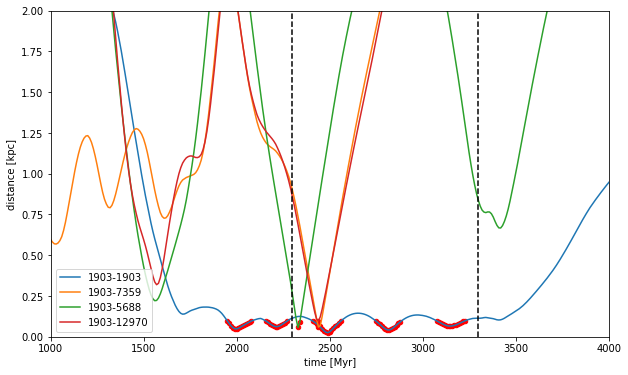

 56%|█████▌    | 5/9 [00:10<00:08,  2.01s/it]

Original pair =  [ 2065 11413]


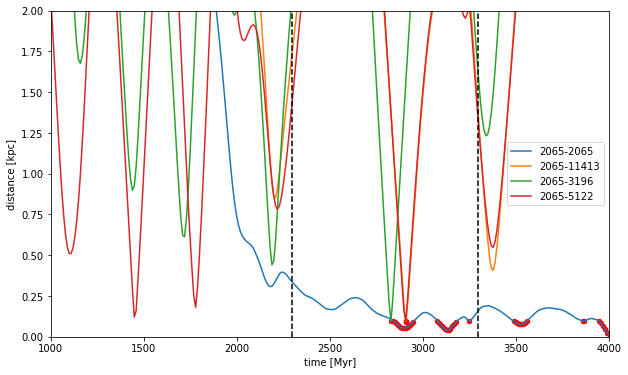

 67%|██████▋   | 6/9 [00:12<00:06,  2.00s/it]

Original pair =  [ 2421 15928]


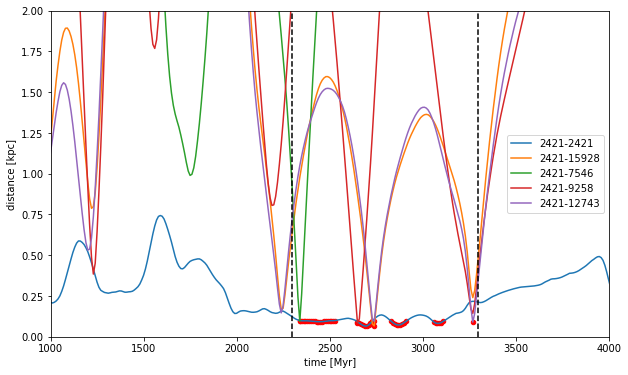

 78%|███████▊  | 7/9 [00:14<00:04,  2.06s/it]

Original pair =  [6311 8060]


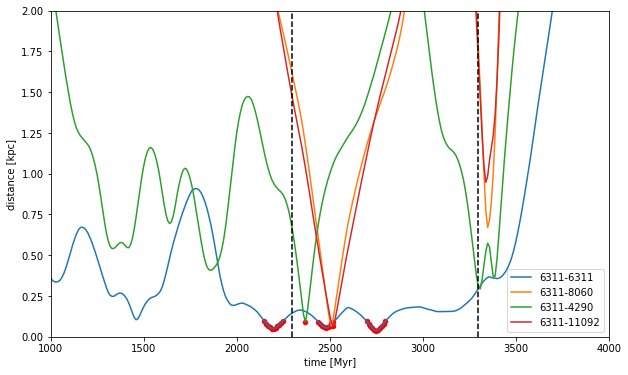

 89%|████████▉ | 8/9 [00:16<00:02,  2.06s/it]

Original pair =  [7699 9427]


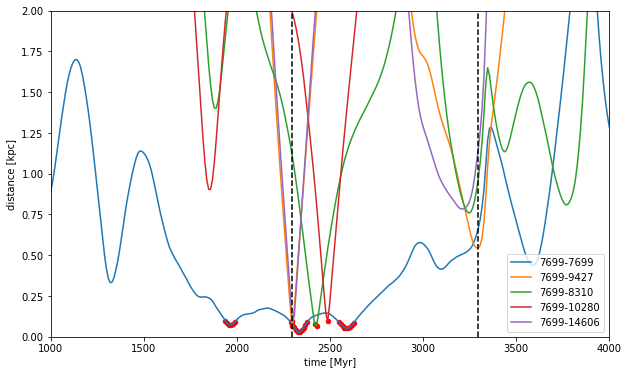

100%|██████████| 9/9 [00:18<00:00,  2.04s/it]


In [13]:
def length_of_candiates(x):
    total = 0
    for i in range(len(x)-1,0,-1):
        total+=i
    return(total)

mypath = "/home/kasper/Team_A/Tidal_Wave/Large/Data/binary_candidate_data/"
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])

for j in tqdm(range(len(multiple_sys))):
    dist = np.zeros((length_of_candiates(multiple_sys[j]),len(onlyfiles)))
    for i in (range(len(onlyfiles))):
        file = fits.open(mypath+onlyfiles[i])
        data1 = file[1].data

        x = data1.field("set_1_x")[np.array(multiple_sys[j])]/3.086e19
        y = data1.field("set_1_y")[np.array(multiple_sys[j])]/3.086e19
        z = data1.field("set_1_z")[np.array(multiple_sys[j])]/3.086e19
        
        num = 0
        for k in range(len(x)):
            for l in range(k+1,len(x)):
                dist[num,i] = distance(x[k],x[l],y[k],y[l],z[k],z[l])
                num+=1
        #dist[:,i] = distance(x[:,0],x[:,1],y[:,0],y[:,1],z[:,0],z[:,1])
    num = 0
    print("Original pair = ",multiple_sys[j][:2])
    plt.figure(figsize = (10,6))
    #plt.title(str(multiple_sys[j][0]))
    for i in range(len(x)):
        #for k in range(i+1,len(x)):
        
        plt.plot(np.arange(len(onlyfiles))*10,dist[num],label = str(multiple_sys[j][0])+"-"+str(multiple_sys[j][i]))
        a= np.where(dist[num]<=0.1)[0]
        plt.scatter(a*10, dist[num,a],color = 'r', s = 20)
        num+=1
    
    plt.axvline(2300,linestyle = "--", color = "k")
    plt.axvline(3300,linestyle = "--", color = "k")
    plt.ylim(0,2)
    plt.xlim(1000,4000)
    plt.xlabel("time [Myr]")
    plt.ylabel("distance [kpc]")
    plt.legend()
    plt.show()
        




In [14]:
multiple_sys

[array([  380,  6758,  8134, 15670]),
 array([  521, 15759,  2059,  4146,  6879]),
 array([  603, 11715,  1482,  3365,  8031,  8539]),
 array([ 1584,  2096,  1553,  6405, 13716]),
 array([ 1903,  7359,  5688, 12970]),
 array([ 2065, 11413,  3196,  5122]),
 array([ 2421, 15928,  7546,  9258, 12743]),
 array([ 6311,  8060,  4290, 11092]),
 array([ 7699,  9427,  8310, 10280, 14606])]

In [16]:
def length_of_candiates(x):
    total = 0
    for i in range(len(x)-1,0,-1):
        total+=i
    return(total)

mypath = "/home/kasper/Team_A/Tidal_Wave/Large/Data/binary_candidate_data/"
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])

for j in (range(7,len(multiple_sys))):
    for i in tqdm(range(len(onlyfiles))):
        timestamp = int(onlyfiles[i][-9:-5])
        file = fits.open(mypath+onlyfiles[i])
        data1 = file[1].data

        x = data1.field("set_1_x")/3.086e19#[np.array(multiple_sys[j])]/3.086e19
        y = data1.field("set_1_y")/3.086e19#[np.array(multiple_sys[j])]/3.086e19
        #z = data1.field("set_1_z")[np.array(multiple_sys[j])]/3.086e19
        
        x_cm = np.mean(x[multiple_sys[j][:2]])
        y_cm = np.mean(y[multiple_sys[j][:2]])
        """
        plt.figure(figsize = (10,8))
        plt.scatter(x,y,s = 0.1)
        plt.title(str(timestamp)+" Myr")
        if timestamp in np.arange(1900,2000):
            plt.text((x_cm-2)+0.1,(y_cm+2)-0.2, "First encounter",fontsize = 20)
        if timestamp in np.arange(2300,2600):
            plt.text((x_cm-2)+0.1,(y_cm+2)-0.2, "Stable Tidal Wave",fontsize = 20)
        if timestamp in np.arange(3000,3600):
            plt.text((x_cm-2)+0.1,(y_cm+2)-0.2, "Fall back Tidal Wave",fontsize = 20)

        for k in range(len(multiple_sys[j])):
            index = multiple_sys[j][k]
            plt.scatter(x[index],y[index], label = str(index))
        del(x,y,data1,file)
        plt.xlim(x_cm - 2,x_cm +2)
        plt.ylim(y_cm - 2,y_cm +2)
        plt.legend(loc = 1)
        #plt.savefig("Tidal_Wave/Large/multiple_systems/"+str(multiple_sys[j][0])+"_"+str(multiple_sys[j][1])+"/snap%04d.png"%timestamp)
        plt.close()
        """

100%|██████████| 528/528 [00:02<00:00, 244.46it/s]
